# Tugas 5

- Nama  : Dino Widian Firmansyah
- Kelas : TF-49.02
- NIM   : 101042500002

# Listing 3: Membaca file teks baris perbaris (Native Python)

In [10]:
# Contoh membaca data sederhana
data_x = []
data_y = []

# ’r’ untuk read. Blok ’with’ otomatis melakukan close()
try:
    with open('damped_osc.dat', 'r') as file:
        for line in file:
            # Mengabaikan baris komentar (diawali #)
            if line.startswith('#'):
                continue

            # Memecah baris berdasarkan spasi/tab
            parts = line.split()

            # Menyimpan ke list
            data_x.append(float(parts[0]))
            data_y.append(float(parts[1]))
            
    print(f"Berhasil membaca {len(data_x)} titik data.")
except FileNotFoundError:
    print("File tidak ditemukan!")

Berhasil membaca 501 titik data.


#  Listing 4: Membaca data menggunakan NumPy

Data Loaded. Max X: 1.0


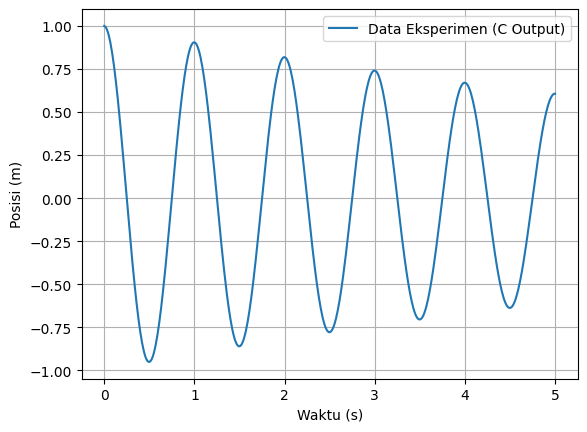

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Membaca data dari file yang dibuat oleh program C tadi
# unpack=True membalik matriks sehingga kita bisa langsung assign ke variabel t, x
# # comments=’#’ memberitahu numpy untuk mengabaikan header

t, x = np.loadtxt('damped_osc.dat', unpack=True, comments='#')

print(f"Data Loaded. Max X: {np.max(x)}")

# Plotting sederhana untuk verifikasi
plt.plot(t, x, label='Data Eksperimen (C Output)')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi (m)')
plt.grid(True)
plt.legend()
# plt.show() # Uncomment untuk menampilkan


# Listing 5: Menyimpan hasil analisis ke file baru

In [3]:
# Misalkan kita menghitung Energi Potensial: V = 0.5 * k * x^2
k = 10.0 # N/m
V_pot = 0.5 * k * x**2

# Kita ingin menyimpan data t, x, dan V_pot (3 kolom)
# column_stack menggabungkan array 1D menjadi kolom-kolom
data_to_save = np.column_stack((t, x, V_pot))

# Header ditambahkan agar file informatif
header_txt = "Time(s) Position(m) PotentialEnergy(J)"

# fmt=’%.4e’ menggunakan notasi ilmiah (scientific notation)
np.savetxt('energy_analysis.txt', data_to_save,
           fmt='%.4e', delimiter='\t', header=header_txt)
print("Analisis energi disimpan ke 'energy_analysis.txt'")

Analisis energi disimpan ke 'energy_analysis.txt'


# Pandas


In [12]:
import pandas as pd

# Membaca CSV dengan header otomatis
df = pd.read_csv('experiment_data_complex.csv')

# Mengakses kolom seperti dictionary
print(df['Voltage'])

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
8    4.5
9    5.0
Name: Voltage, dtype: float64


#   Listing 7: Pengolahan Data XRD (Python)

In [8]:
import numpy as np

# 1. Membaca Data
# skiprows=5 sangat penting untuk melewati metadata
filename = 'raw_xrd.dat'
print(f"Sedang memproses {filename}...")

try:
    angle, counts = np.loadtxt(filename, skiprows=5, unpack=True)
except ValueError:
    print("Format file salah atau header tidak sesuai!")
    exit()
    
# 2. Analisis Data
max_counts = np.max(counts)
max_idx = np.argmax(counts)
peak_angle = angle[max_idx]

print(f"Intensitas Maksimum: {max_counts} pada sudut {peak_angle} derajat.")

# 3. Operasi Vektorisasi (Normalisasi)
# NumPy memungkinkan kita membagi seluruh array tanpa loop
normalized_counts = counts / max_counts

# 4. Filter Data (Contoh Logika Fisika)
# Kita hanya ingin menyimpan data dengan intensitas signifikan (> 0.1)
mask = normalized_counts > 0.1
filtered_angle = angle[mask]
filtered_counts = normalized_counts[mask]

# 5. Menyimpan Hasil ke CSV (Format yang bisa dibuka Excel)
output_data = np.column_stack((filtered_angle, filtered_counts))
np.savetxt('processed_xrd.csv', output_data,
            delimiter=',',
            header='TwoTheta,NormIntensity',
            fmt=['%.2f', '%.4f'], # Format berbeda tiap kolom
            comments='') # Hilangkan tanda # agar header bersih untuk Excel

print("Data ternormalisasi disimpan ke 'processed_xrd.csv'")

Sedang memproses raw_xrd.dat...
Intensitas Maksimum: 1052.0 pada sudut 28.4 derajat.
Data ternormalisasi disimpan ke 'processed_xrd.csv'
